<a href="https://colab.research.google.com/github/Akanksha546/notebook2/blob/main/ML12th_ipynn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

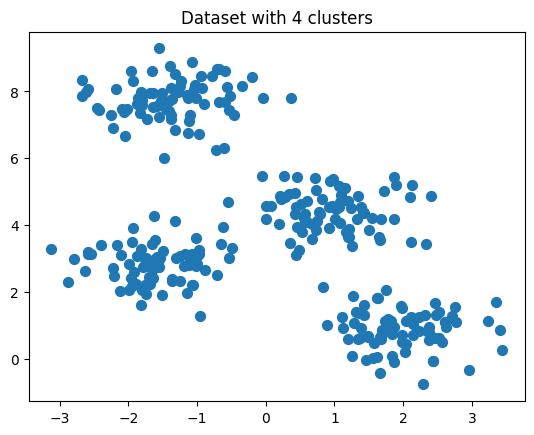

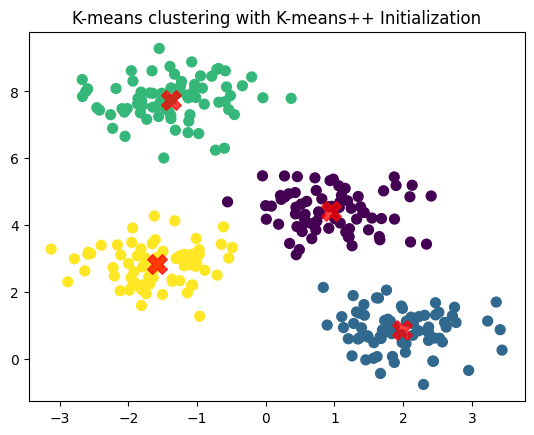

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

#generate a dataset using make_blobs
X,y=make_blobs(n_samples=300,centers=4,cluster_std=0.60,random_state=0)

#visualize  the dataset
plt.scatter(X[:,0],X[:,1],s=50)
plt.title("Dataset with 4 clusters")
plt.show()

#initialize and fit kmeans using k-means++ initialization
kmeans=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
kmeans.fit(X)

#predict the cluster labels
y_means=kmeans.predict(X)

#visualize the clusters
plt.scatter(X[:,0],X[:,1],c=y_means,s=50,cmap='viridis')

#plot the clusters centers
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='red',s=200,alpha=0.75,marker='X')
plt.title("K-means clustering with K-means++ Initialization")
plt.show()

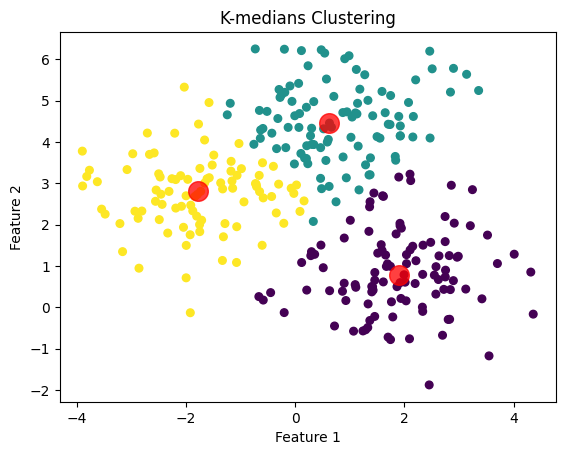

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin_min

# step 1: generate the dataset
n_samples = 300
n_features = 2
centers = 3
X, _ = make_blobs(n_samples=n_samples, centers=centers, random_state=0)

# step 2: implement the k-median algorithm
def kmedians(X, n_clusters, max_iter=100):
    # randomly initialize centroids by choosing random points from the dataset
    random_indices = np.random.choice(len(X), size=n_clusters, replace=False)
    centroids = X[random_indices]

    for _ in range(max_iter):
        # assign each point to the closest centroid based on the Manhattan distance
        labels, _ = pairwise_distances_argmin_min(X, centroids, metric='manhattan')

        # update the centroids by taking the median of the points assigned to each cluster
        new_centroids = np.array([np.median(X[labels == i], axis=0) for i in range(n_clusters)])

        # check for convergence (if centroids do not change)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return centroids, labels

# step 3: apply the algorithm to the dataset
n_clusters = 3
centroids, labels = kmedians(X, n_clusters)

# step 4: visualize the results
plt.scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75)
plt.title("K-medians Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')